In [11]:
import pandas as pd
path = "Final/"

In [160]:
def charge_data(dataset, optimizer):
    # Read and concatenate data using list comprehension
    print(f"Reading {dataset} {optimizer}...")
    files = [f"{dataset}/history_lin:3_conv:3_iter:{iter}_opt:{optimizer}_sch:False.csv" for iter in range(5)]
    data = [pd.read_csv(file).assign(iter=iter, epoch=lambda df: df.index) for iter, file in enumerate(files)]

    return pd.concat(data, ignore_index=True)

#create a new dataframe with the mean of the values as a row and mantain the columns
def get_mean_std(grouped, epoch):

    mean = grouped.drop(columns=['iter', 'epoch']).mean()
    mean = mean.to_frame().T    

    std = grouped.drop(columns=['iter', 'epoch']).std()
    std = std.to_frame().T
    
    # Prefix std columns and concatenate mean and std dataframes
    std.columns = ['std_' + col for col in std.columns]
    result = pd.concat([mean, std], axis=1)
    result['epoch'] = epoch

    return result


def create_new_dataset(dataset, optimizer):
    data = charge_data(dataset, optimizer)

    data_grouped = data.groupby(['epoch'])
    data_grouped_0 = data_grouped.get_group((0))
    new_df = get_mean_std(data_grouped_0, 0)


    for i in range(1,30):
        grouped = data_grouped.get_group((i))
        new_df = pd.concat([new_df, get_mean_std(grouped, i)])

    new_df.to_csv(f"Final/{dataset}_{optimizer}.csv", index=False)
    print(f"{dataset} {optimizer}.csv created\n")



def charge_data(dataset):

    optimizers = ['SGD', 'Adam', 'SCRN', 'SCRN_Momentum']
    load = [f"{dataset}_{optimizer}.csv" for optimizer in optimizers]

    #into a dataframe adding a column with the optimizer name
    df = pd.DataFrame()
    for file in load:
        df_temp = pd.read_csv(path + file)
        #consider the case of scrn_momentum
        if 'Momentum' in file:
            df_temp['optimizer'] = 'SCRN_Momentum'
        else:
            df_temp['optimizer'] = file.split('_')[1].split('.')[0]
        df = pd.concat([df, df_temp])

    df['difference'] = df['val_loss'] - df[' train_loss']

    losses = df.describe()[[' train_loss', 'val_loss']]
    min_loss = losses.loc['min'].min()
    max_loss = losses.loc['max'].max()
    

    min_loss, max_loss
    return df, min_loss, max_loss

In [8]:
datasets = ['MNIST', 'CIFAR10', 'CIFAR100']
optimizers = ['SGD', 'Adam', 'SCRN', 'SCRN_Momentum']

for dataset in datasets:
    for optimizer in optimizers:
        create_new_dataset(dataset, optimizer)

Reading MNIST SGD...
MNIST SGD.csv created

Reading MNIST Adam...
MNIST Adam.csv created

Reading MNIST SCRN...
MNIST SCRN.csv created

Reading MNIST SCRN_Momentum...
MNIST SCRN_Momentum.csv created

Reading CIFAR10 SGD...
CIFAR10 SGD.csv created

Reading CIFAR10 Adam...
CIFAR10 Adam.csv created

Reading CIFAR10 SCRN...
CIFAR10 SCRN.csv created

Reading CIFAR10 SCRN_Momentum...
CIFAR10 SCRN_Momentum.csv created

Reading CIFAR100 SGD...
CIFAR100 SGD.csv created

Reading CIFAR100 Adam...
CIFAR100 Adam.csv created

Reading CIFAR100 SCRN...
CIFAR100 SCRN.csv created

Reading CIFAR100 SCRN_Momentum...
CIFAR100 SCRN_Momentum.csv created



In [155]:
dataset = 'CIFAR10'
optimizers = ['SGD', 'Adam', 'SCRN', 'SCRN_Momentum']
load = [f"{dataset}_{optimizer}.csv" for optimizer in optimizers]

#into a dataframe adding a column with the optimizer name
df = pd.DataFrame()
for file in load:
    df_temp = pd.read_csv(path + file)
    #consider the case of scrn_momentum
    if 'Momentum' in file:
        df_temp['optimizer'] = 'SCRN_Momentum'
    else:
        df_temp['optimizer'] = file.split('_')[1].split('.')[0]
    df = pd.concat([df, df_temp])



losses = df.describe()[[' train_loss', 'val_loss']]
min_loss = losses.loc['min'].min()
max_loss = losses.loc['max'].max()

min_loss, max_loss

(1.4730398808055454, 2.3026512795554264)

In [164]:
dataset = 'CIFAR100'
df, min_loss, max_loss = charge_data(dataset)

In [165]:
df

,train_acc,train_loss,val_acc,val_loss,std_train_acc,std_ train_loss,std_val_acc,std_val_loss,epoch,optimizer,difference
0,0.009813,4.605267,0.00952,4.605319,0.000486,0.000006,0.001553,0.000133,0,SGD,0.000053
1,0.141698,4.369354,0.19052,4.306063,0.003972,0.002317,0.010350,0.004409,1,SGD,-0.063291
2,0.239840,4.264041,0.23596,4.263171,0.004625,0.003419,0.012834,0.006176,2,SGD,-0.000870
3,0.296729,4.213566,0.26944,4.231354,0.007421,0.003249,0.004394,0.003415,3,SGD,0.017788
4,0.339080,4.174845,0.28512,4.213038,0.005485,0.003511,0.005859,0.004559,4,SGD,0.038193
...,...,...,...,...,...,...,...,...,...,...,...
25,0.362409,3.824036,0.32008,3.933000,0.006058,0.004826,0.003068,0.004333,25,SCRN_Momentum,0.108964
26,0.369458,3.819701,0.32796,3.933099,0.005436,0.004459,0.008864,0.005327,26,SCRN_Momentum,0.113398
27,0.375280,3.814700,0.33180,3.930829,0.007996,0.005249,0.007089,0.004613,27,SCRN_Momentum,0.116128
28,0.381733,3.810170,0.33168,3.930273,0.005440,0.004034,0.011711,0.007765,28,SCRN_Momentum,0.120102


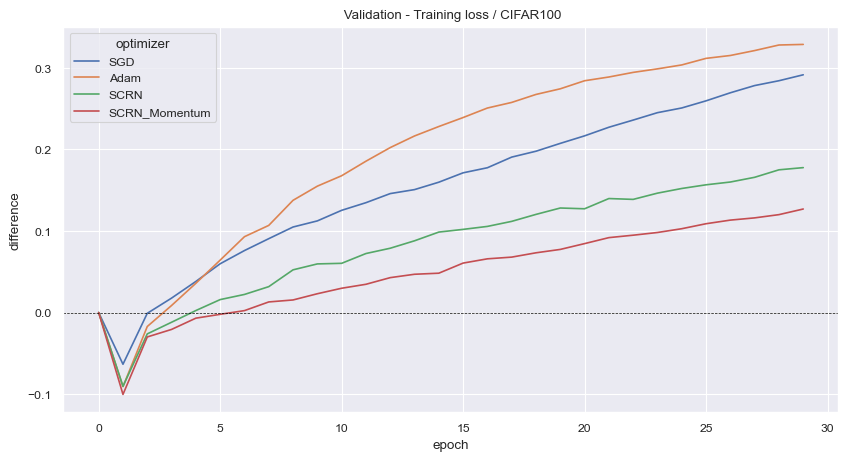

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the loss
sns.set_style("darkgrid")
sns.set_context("paper")
plt.figure(figsize=(10, 5))
sns.lineplot(x="epoch", y="difference", hue="optimizer", data=df)
plt.title(f" Validation - Training loss / {dataset}")
# put a line on 0 with puntual style
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)

# Set y-axis limits

plt.show()

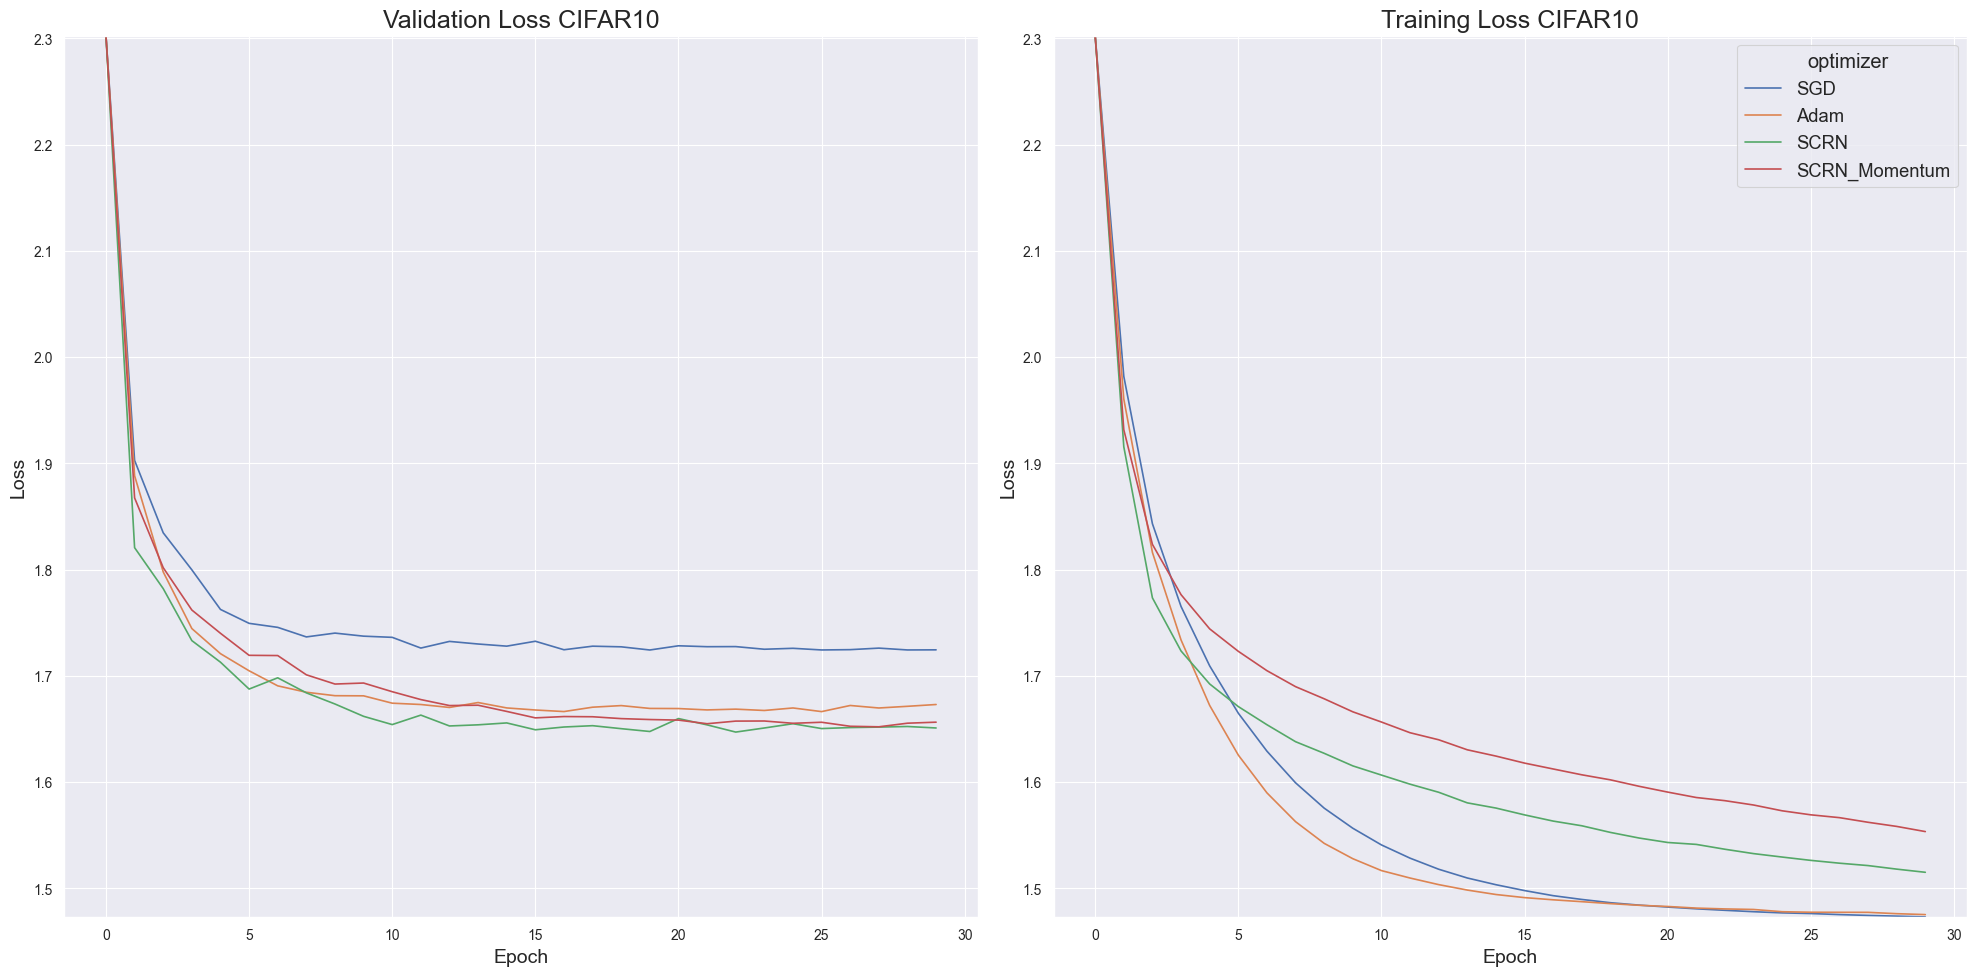

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains both 'val_loss' and 'train_loss'

# Set the style and increase the font scale globally
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5)  # Increase font scale

# Create a figure and a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # 1 row, 2 columns


# First subplot for validation loss
sns.lineplot(x="epoch", y="val_loss", hue="optimizer", data=df, ax=axes[0], legend=False)
axes[0].set_title(f"Validation Loss {dataset}", fontsize=18)  # Set title font size
axes[0].set_ylim(min_loss, max_loss)
axes[0].set_xlabel("Epoch", fontsize=14)  # Set x-axis label font size
axes[0].set_ylabel("Loss", fontsize=14)  # Set y-axis label font size

# Second subplot for training loss
sns.lineplot(x="epoch", y=" train_loss", hue="optimizer", data=df, ax=axes[1])
axes[1].set_title(f"Training Loss {dataset}", fontsize=18)  # Set title font size
axes[1].set_ylim(min_loss, max_loss)
axes[1].set_xlabel("Epoch", fontsize=14)  # Set x-axis label font size
axes[1].set_ylabel("Loss", fontsize=14)  # Set y-axis label font size

# Set the tick parameters
for ax in axes:
    ax.tick_params(axis='both', labelsize=10)  # Set the size of tick labels

# Display the plots
plt.tight_layout()
plt.show()


In [157]:

dataset = 'CIFAR10'
optimizers = ['SGD', 'Adam', 'SCRN', 'SCRN_Momentum']
load = [f"{dataset}_{optimizer}.csv" for optimizer in optimizers]

#into a dataframe adding a column with the optimizer name
df = pd.DataFrame()
for file in load:
    df_temp = pd.read_csv(path + file)
    #consider the case of scrn_momentum
    if 'Momentum' in file:
        df_temp['optimizer'] = 'SCRN_Momentum'
    else:
        df_temp['optimizer'] = file.split('_')[1].split('.')[0]
    df = pd.concat([df, df_temp])



losses = df.describe()[['train_acc', 'val_acc']]
min_loss = losses.loc['min'].min()
max_loss = losses.loc['max'].max()

min_loss, max_loss

(0.0998133333333332, 0.9992933301130932)

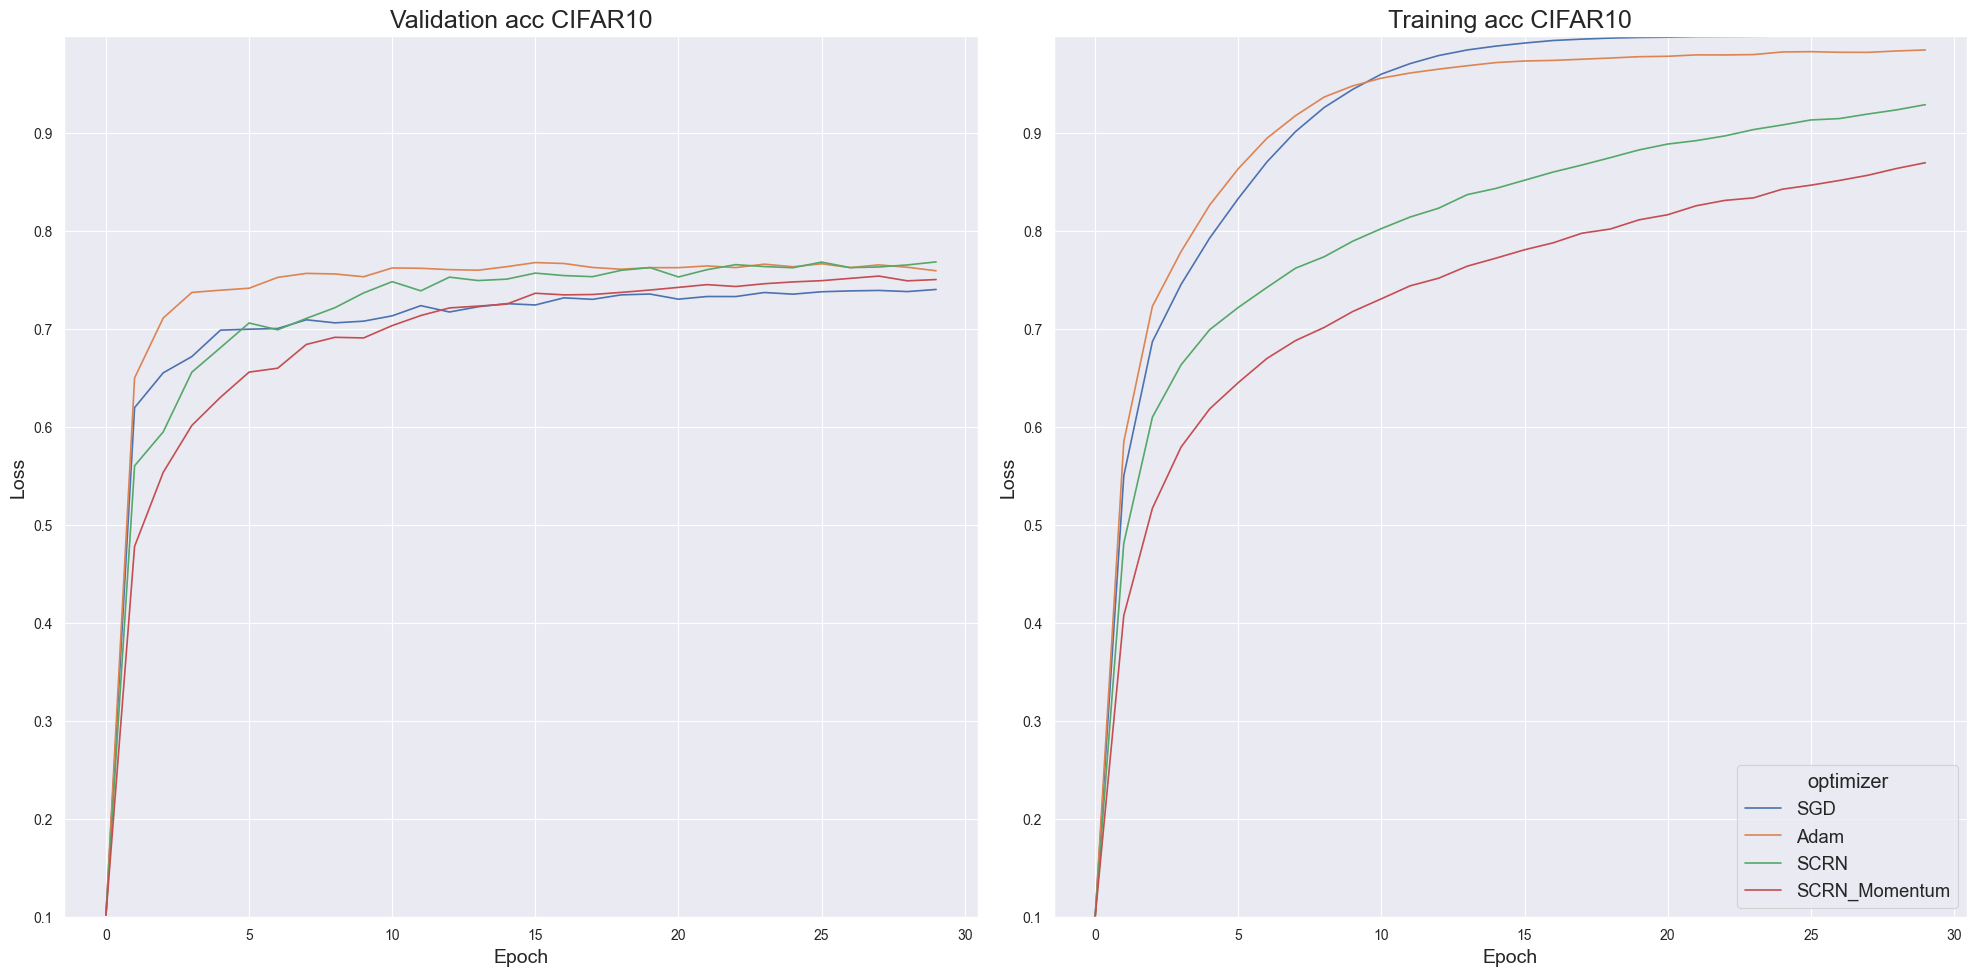

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains both 'val_loss' and 'train_loss'

# Set the style and increase the font scale globally
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5)  # Increase font scale

# Create a figure and a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # 1 row, 2 columns


# First subplot for validation loss
sns.lineplot(x="epoch", y="val_acc", hue="optimizer", data=df, ax=axes[0], legend=False)
axes[0].set_title(f"Validation acc {dataset}", fontsize=18)  # Set title font size
axes[0].set_ylim(min_loss, max_loss)
axes[0].set_xlabel("Epoch", fontsize=14)  # Set x-axis label font size
axes[0].set_ylabel("Loss", fontsize=14)  # Set y-axis label font size

# Second subplot for training loss
sns.lineplot(x="epoch", y="train_acc", hue="optimizer", data=df, ax=axes[1])
axes[1].set_title(f"Training acc {dataset}", fontsize=18)  # Set title font size
axes[1].set_ylim(min_loss, max_loss)
axes[1].set_xlabel("Epoch", fontsize=14)  # Set x-axis label font size
axes[1].set_ylabel("Loss", fontsize=14)  # Set y-axis label font size

# Set the tick parameters
for ax in axes:
    ax.tick_params(axis='both', labelsize=10)  # Set the size of tick labels

# Display the plots
plt.tight_layout()
plt.show()
